# Data Wrangling

## Introduction
The dataset that has been wrangled in this project is sourced from the twitter archive associated with tweets from various twitter users @dog_rates, also known as WeRateDogs. WeRateDogs is a twitter account that has received a huge amount of international media attention as users rate dogs with a humorous comment. There are three datasets in this project: twitter archive data, image predition data, and tweet json data. The datasets need to be laoded, assessed and cleaned utilizing various analytics methodologies of pandas framework. One of the datasets consist of 2356 tweets in total that range from Nov 2015 to Aug 2017. Additionally, visualizations need to be created to understand and display the meaning of the data.

### Project Details
Below is the outline of the project
* Data wrangling that consists of
    - Gathering Data
    - Assessing Data
    - Cleaning Data
* Storing, Analyzing, and Visualizing the wrangled data
* Reporting on 1) the data wrangling efforts and 2) the data analysis and visualization


## Gathering Data
### 1. Twitter data

In [19]:
#Import all packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy
import re
import json
import seaborn as sns

In [20]:
#Read CSV file 
twitter_df = pd.read_csv('twitter-archive-enhanced-2.csv')

In [21]:
twitter_df.sort_values('timestamp')
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [22]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### 2. Tweet Image Prediction

In [23]:
# Loading the image prediction file from udacity programitcally
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions-3.tsv', mode ='wb') as file:
    file.write(response.content)
    
#Read TSV file
image_prediction = pd.read_csv('image-predictions-3.tsv', sep='\t' )

In [24]:
# Setting up the Twitter API with authentication
consumer_api_key = 'hidden'
consumer_api_secret = 'hidden'
access_token = 'hidden'
access_token_secret = 'hidden'

auth = tweepy.OAuthHandler(consumer_api_key, consumer_api_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

### 3. Twitter API and JSON

In [18]:
#Download Tweepy status object based on Tweet ID and store in list
     
tweet_ids = list(twitter_df['tweet_id'])

tweet_data = []
tweets_success = []
tweets_missing = []
for tweet_id in tweet_ids:
    try:
        data = api.get_status(tweet_id, 
                              tweet_mode='extended',
                              wait_on_rate_limit = True,
                              wait_on_rate_limit_notify = True)
        tweet_data.append(data)
        tweets_success.append(tweet_id)
    except:
        tweets_missing.append(tweet_id)
        print(tweet_id)

888202515573088257
873697596434513921
872668790621863937
872261713294495745
869988702071779329
866816280283807744
861769973181624320
856602993587888130
851953902622658560
845459076796616705
844704788403113984
842892208864923648
837366284874571778
837012587749474308
829374341691346946
827228250799742977
812747805718642688
802247111496568832
779123168116150273
775096608509886464
771004394259247104
770743923962707968
759566828574212096


Rate limit reached. Sleeping for: 712


754011816964026368
680055455951884288


Rate limit reached. Sleeping for: 705


In [25]:
# Write tweet data to json file
with open('tweet_json.txt', mode = 'w') as file:
    json.dump(tweet_data, file)

In [26]:
# Load the Twitter API data
twitter2 = pd.read_json('tweet_json.txt')
twitter2.head()
twitter2['tweet_id'] = tweets_success
twitter2 = twitter2[['tweet_id','favorited','favorite_count','retweeted','retweet_count','retweeted_status']]

In [27]:
twitter2.to_csv('tweet_json.txt', index = False)

In [28]:
twitter2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   int64 
 1   favorited         2331 non-null   bool  
 2   favorite_count    2331 non-null   int64 
 3   retweeted         2331 non-null   bool  
 4   retweet_count     2331 non-null   int64 
 5   retweeted_status  163 non-null    object
dtypes: bool(2), int64(3), object(1)
memory usage: 77.5+ KB


## Assessing Data

### 1. Twitter Archived Enhanced Data

In [29]:
twitter_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
128,867774946302451713,NaN,NaN,2017-05-25 16:10:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Harold. He's h*ckin cooperative. 13/10 g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/867774946...,13,10,Harold,None,None,None,None
1693,681297372102656000,NaN,NaN,2015-12-28 02:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is actually a lion. We only rate dogs. Fo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681297372...,12,10,actually,None,None,None,None
1531,690015576308211712,NaN,NaN,2016-01-21 03:38:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper can only sleep on shoes. It's a cr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690015576...,12,10,None,None,None,pupper,None
2065,671151324042559489,NaN,NaN,2015-11-30 02:18:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*struggling to breathe properly* 12/10 https:/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671151324...,12,10,None,None,None,None,None
826,769335591808995329,NaN,NaN,2016-08-27 00:47:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Ever seen a dog pet another dog...,7.069045e+17,4.196984e+09,2016-03-07 18:09:06 +0000,"https://vine.co/v/iXQAm5Lrgrh,https://vine.co/...",13,10,None,None,None,None,None


In [28]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [30]:
twitter_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [31]:
twitter_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [32]:
sum(twitter_df['tweet_id'].duplicated())

0

In [32]:
sum(twitter_df['expanded_urls'].duplicated())

137

In [33]:
twitter_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [33]:
print(twitter_df.loc[twitter_df.rating_numerator == 2, 'text']) 
print(twitter_df.loc[twitter_df.rating_numerator == 420, 'text']) 
print(twitter_df.loc[twitter_df.rating_numerator == 75, 'text']) 
print(twitter_df.loc[twitter_df.rating_numerator == 960, 'text'])
print(twitter_df.loc[twitter_df.rating_numerator == 204, 'text'])

1761    Exotic pup here. Tail long af. Throat looks sw...
1764    This is Crystal. She's a shitty fireman. No se...
1920    This is Henry. He's a shit dog. Short pointy e...
2079    Scary dog here. Too many legs. Extra tail. Not...
2237    This lil pup is Oliver. Hops around. Has wings...
2246    This is Tedrick. He lives on the edge. Needs s...
2310    Unfamiliar with this breed. Ears pointy af. Wo...
2326    This is quite the dog. Gets really excited whe...
2349    This is an odd dog. Hard on the outside but lo...
Name: text, dtype: object
188     @dhmontgomery We also gave snoop dogg a 420/10...
2074    After so many requests... here you go.\n\nGood...
Name: text, dtype: object
340    RT @dog_rates: This is Logan, the Chow who liv...
695    This is Logan, the Chow who lived. He solemnly...
Name: text, dtype: object
313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object
1120    Say hello to this unbelievably well behaved sq...
Name: text, dtype: object


In [34]:
twitter_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [35]:
# Display the texts which contain ratings

with pd.option_context('max_colwidth', 200):
    display(twitter_df[twitter_df['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/Users/bijayshrestha/opt/anaconda3/envs/udacity/lib/python3.7/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


### 2. Image Prediction Data

In [36]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [37]:
image_prediction.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2017,880095782870896641,https://pbs.twimg.com/media/DDa6ckbXgAAM1vV.jpg,1,miniature_pinscher,0.120298,True,Rhodesian_ridgeback,0.106395,True,beagle,0.106073,True
1577,796116448414461957,https://pbs.twimg.com/media/CwxfrguUUAA1cbl.jpg,1,Cardigan,0.700182,True,Pembroke,0.260738,True,papillon,0.017110,True
1166,735635087207878657,https://pbs.twimg.com/media/CjWANBlVAAAaN-a.jpg,1,pug,0.891871,True,goose,0.014377,False,fur_coat,0.008451,False
1692,815990720817401858,https://pbs.twimg.com/media/C1L7OVVWQAIQ6Tt.jpg,1,Chihuahua,0.428756,True,miniature_pinscher,0.103912,True,Staffordshire_bullterrier,0.088959,True
2042,885528943205470208,https://pbs.twimg.com/media/DEoH3yvXgAAzQtS.jpg,1,pug,0.369275,True,Labrador_retriever,0.265835,True,kuvasz,0.134697,True


In [38]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [71]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [59]:
sum(image_prediction.jpg_url.duplicated())

66

In [61]:
image_prediction

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [69]:
image_prediction['tweet_id'].value_counts()

685532292383666176    1
826598365270007810    1
692158366030913536    1
714606013974974464    1
715696743237730304    1
                     ..
816829038950027264    1
847971574464610304    1
713175907180089344    1
670338931251150849    1
700151421916807169    1
Name: tweet_id, Length: 2075, dtype: int64

In [70]:
image_prediction['jpg_url'].value_counts()

https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg                                            2
https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OFW0yueFu9oTUiQ.jpg    2
https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg                                            2
https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/C8hwNxbXYAAwyVG.jpg                                            1
https://pbs.twimg.com/media/CWsGnyMVEAAM1Y1.jpg                                            1
https://pbs.twimg.com/media/C8C0JYHW0AAy-7u.jpg                                            1
https://pbs.twimg.com/media/C8IKUjAUwAEP-En.jpg                                            1
https://pbs.twimg.com/ext_tw_video_thumb/841311812641533952/pu/img/sBU

In [63]:
image_prediction['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [33]:
image_prediction['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
bald_eagle              1
shopping_basket         1
fire_engine             1
bee_eater               1
shield                  1
Name: p1, Length: 378, dtype: int64

In [65]:
image_prediction['p1_conf'].value_counts()

0.366248    2
0.713293    2
0.375098    2
0.636169    2
0.611525    2
           ..
0.713102    1
0.765266    1
0.491022    1
0.905334    1
1.000000    1
Name: p1_conf, Length: 2006, dtype: int64

In [66]:
image_prediction['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [67]:
image_prediction['p2'].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
paper_towel             1
computer_keyboard       1
shovel                  1
bobsled                 1
lighter                 1
Name: p2, Length: 405, dtype: int64

In [68]:
image_prediction['p2_conf'].value_counts()

0.069362    3
0.027907    2
0.193654    2
0.271929    2
0.003143    2
           ..
0.138331    1
0.254884    1
0.090644    1
0.219323    1
0.016301    1
Name: p2_conf, Length: 2004, dtype: int64

### 3. Twitter API Data

In [39]:
twitter2.sample(10)

,tweet_id,favorited,favorite_count,retweeted,retweet_count,retweeted_status
669,788039637453406209,False,6255,False,1352,NaN
1938,673352124999274496,False,1608,False,519,NaN
2163,668975677807423489,False,1256,False,556,NaN
2069,670778058496974848,False,319,False,71,NaN
399,822647212903690241,False,0,False,6509,{'created_at': 'Fri Jan 20 17:00:46 +0000 2017...
2302,666407126856765440,False,100,False,32,NaN
1578,685973236358713344,False,2101,False,522,NaN
1881,674468880899788800,False,6053,False,1971,NaN
2103,670303360680108032,False,418,False,126,NaN
539,803638050916102144,False,11197,False,4245,NaN


In [40]:
twitter2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   int64 
 1   favorited         2331 non-null   bool  
 2   favorite_count    2331 non-null   int64 
 3   retweeted         2331 non-null   bool  
 4   retweet_count     2331 non-null   int64 
 5   retweeted_status  163 non-null    object
dtypes: bool(2), int64(3), object(1)
memory usage: 77.5+ KB


In [95]:
twitter2.describe()

,tweet_id,favorite_count,retweet_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.419183e+17,7581.669532,2713.030941
std,6.826980e+16,11768.332564,4588.758761
min,6.660209e+17,0.000000,1.000000
25%,6.782670e+17,1322.000000,548.500000
50%,7.182346e+17,3297.000000,1272.000000
75%,7.986778e+17,9284.500000,3150.500000
max,8.924206e+17,156601.000000,78056.000000


In [204]:
twitter2[twitter2.duplicated(['favorited'], keep=False)]

,tweet_id,favorited,favorite_count,retweeted,retweet_count,retweeted_status
0,892420643555336193,False,36291,False,7724,NaN
1,892177421306343426,False,31291,False,5718,NaN
2,891815181378084864,False,23563,False,3786,NaN
3,891689557279858688,False,39581,False,7879,NaN
4,891327558926688256,False,37791,False,8506,NaN
...,...,...,...,...,...,...
2322,666049248165822465,False,96,False,39,NaN
2323,666044226329800704,False,272,False,132,NaN
2324,666033412701032449,False,112,False,41,NaN
2325,666029285002620928,False,121,False,42,NaN


In [41]:
twitter2['tweet_id'].value_counts()

749075273010798592    1
671163268581498880    1
743510151680958465    1
798644042770751489    1
825120256414846976    1
                     ..
794926597468000259    1
673705679337693185    1
673342308415348736    1
754482103782404096    1
700151421916807169    1
Name: tweet_id, Length: 2331, dtype: int64

In [36]:
twitter2['favorite_count'].value_counts()

0       163
1609      4
4110      3
1073      3
2413      3
       ... 
581       1
2971      1
4679      1
1774      1
4099      1
Name: favorite_count, Length: 1982, dtype: int64

In [100]:
twitter2['retweet_count'].value_counts()

555     6
225     5
204     4
123     4
1963    4
       ..
2458    1
1430    1
4513    1
419     1
35      1
Name: retweet_count, Length: 1705, dtype: int64

### Quality

In [42]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [113]:
twitter_df.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Grizzwald. He may be the floofiest floofe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690...,13,10,Grizzwald,None,floofer,None,None
1334,705428427625635840,NaN,NaN,2016-03-03 16:23:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ambrose. He's an Alfalfa Ballyhoo. Dra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705428427...,11,10,Ambrose,None,None,pupper,None
762,778039087836069888,NaN,NaN,2016-09-20 01:12:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Evolution of a pupper yawn featuring Max. 12/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778039087...,12,10,None,None,None,pupper,None
1619,684959798585110529,NaN,NaN,2016-01-07 04:48:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's a neat dog. No legs (tragi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684959798...,5,10,Jerry,None,None,None,None
2267,667524857454854144,NaN,NaN,2015-11-20 02:08:22 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Another topnotch dog. His name is Big Jumpy Ra...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667524857...,12,10,None,None,None,None,None
299,836989968035819520,NaN,NaN,2017-03-01 17:22:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mookie. He really enjoys shopping but ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836989968...,12,10,Mookie,None,None,None,None
1901,674646392044941312,NaN,NaN,2015-12-09 17:46:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Two gorgeous dogs here. Little waddling dog is...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674646392...,5,10,None,None,None,None,None
1411,698989035503689728,NaN,NaN,2016-02-14 21:55:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He does toe touches in his sle...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/698989035...,13,10,Oliver,None,None,None,None
1713,680473011644985345,NaN,NaN,2015-12-25 19:39:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hector. He thinks he's a hammer. Silly...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680473011...,10,10,Hector,None,None,pupper,None
1648,683773439333797890,NaN,NaN,2016-01-03 22:14:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Buddy. He's gaining strength. Currentl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683773439...,9,10,Buddy,None,None,None,None


In [206]:
twitter2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2327 non-null   int64 
 1   favorited         2327 non-null   bool  
 2   favorite_count    2327 non-null   int64 
 3   retweeted         2327 non-null   bool  
 4   retweet_count     2327 non-null   int64 
 5   retweeted_status  163 non-null    object
dtypes: bool(2), int64(3), object(1)
memory usage: 77.4+ KB


In [38]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### twitter archive data
* need to clean the retweets data as we only want the original tweets
* has quite a few unnecessary columns, should be dropped for data readability; in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be should be dropped
* timestamp, retweeted_status_timestamp should be datetime instead of objects
* in several columns null objects are not null (NAN instead of None)
* name column has inconsistent values such as 'None', 'a', 'an', not', 'this', 'the', 'one', 'my', 'mad', 'all', 'quite', 'by'
* rating_numerator, rating_denominator have inconsistent values, denominator should be standardized with a value of 10
* contents of 'source' column should be in a more readable format to display only the source
* there are 5 numerator ratings that have extremely high values (>14 out of 10) which will skew the data; The rows containing these values should be dropped.

#### image prediction data
* there are 66 duplicates of url values
* p1, p2, p3 and their corresponding columns names should be more explanatory
* there are 281 less records in this dataset than that of twitter archive data. there must be some missing values


#### twitter API data
* there are 29 less records in this dataset than that of twitter archive data. there must be some missing values

## Tidiness

* Combine four columns doggo, floofer, pupper, puppo into one
* Join image predictions and twitter api data to twitter archive data

In [191]:
# Make copies of the dataframes for cleaning

twitter_clean_df = twitter_df.copy()
twitter2_clean = twitter2.copy()
image_prediction_clean = image_prediction.copy()

## Cleaning Data
### Quality Issue 1 - clean the retweets data

#### 1.a Define
Delete all the retweets where the column values are not null, columns containing retweet information: 'retweeted_status_id', 'retweeted_status_user_id' , and 'retweeted_status_timestamp'

#### 1.a Code

In [192]:
sum(twitter_clean_df['retweeted_status_id'].notnull())

181

In [193]:
twitter_clean_df = twitter_clean_df[twitter_clean_df['retweeted_status_id'].isna()]

#### 1.a Test

In [194]:
sum(twitter_clean_df['retweeted_status_id'].notnull())

0

In [195]:
# no. of rows dropped with retweets = 2356 - 2175 = 181
twitter_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

#### 1.b Define

Delete all the replies where the columns are not null, columns containing replies information: 'in_reply_to_status_id', 'in_reply_to_user_id'

#### 1.b Code

In [196]:
sum(twitter_clean_df['in_reply_to_status_id'].notnull())

78

In [197]:
twitter_clean_df = twitter_clean_df[twitter_clean_df['in_reply_to_status_id'].isna()]

#### 1.c Test

In [198]:
sum(twitter_clean_df['in_reply_to_status_id'].notnull())

0

In [199]:
# no. of rows dropped with replies = 2175 - 2097 = 78
twitter_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

###  Quality Issue 2 - Drop unnecessary columns

#### Define
Now finally we would want to drop these columns as they will not used and create clutter from readability perspective. 
Columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp' should be dropped. We needed to clean the data first before dropping them becuase, the null values will still be there in the dataset. 

#### Code

In [201]:
twitter_clean_df = twitter_clean_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)


#### Test

In [202]:
# five cloumns have been dropped
twitter_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Tidiness Issue 1 - Merge all datasets

#### Define
Merge all three datasets into one

#### Code

In [203]:
twitter_combined_df = pd.merge(twitter_clean_df, twitter2_clean, 
                      how = 'left', on = ['tweet_id'])

In [204]:
twitter_combined_df = pd.merge(twitter_combined_df, image_prediction_clean, 
                      how = 'left', on = ['tweet_id'])

#### Test

In [205]:
twitter_combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   int64  
 1   timestamp           2097 non-null   object 
 2   source              2097 non-null   object 
 3   text                2097 non-null   object 
 4   expanded_urls       2094 non-null   object 
 5   rating_numerator    2097 non-null   int64  
 6   rating_denominator  2097 non-null   int64  
 7   name                2097 non-null   object 
 8   doggo               2097 non-null   object 
 9   floofer             2097 non-null   object 
 10  pupper              2097 non-null   object 
 11  puppo               2097 non-null   object 
 12  favorited           2090 non-null   object 
 13  favorite_count      2090 non-null   float64
 14  retweeted           2090 non-null   object 
 15  retweet_count       2090 non-null   float64
 16  retwee

### Tidiness Issue 2 - Merge four columns into one

#### Define
Merge 'doggo', 'floofer', 'pupper', and 'puppo' columns into one as 'dog_stage'

#### Code

In [206]:
twitter_combined_clean_df = twitter_combined_df.copy()

In [207]:
twitter_combined_clean_df['doggo'].replace('None','',inplace=True)
twitter_combined_clean_df['floofer'].replace('None','',inplace=True)
twitter_combined_clean_df['pupper'].replace('None','',inplace=True)
twitter_combined_clean_df['puppo'].replace('None','',inplace=True)

In [208]:
twitter_combined_clean_df['dog_stage'] = twitter_combined_clean_df['doggo'] + twitter_combined_clean_df['floofer'] + twitter_combined_clean_df['pupper'] + twitter_combined_clean_df['puppo']


In [209]:
twitter_combined_clean_df['dog_stage'].replace('doggopupper','multiple',inplace=True)
twitter_combined_clean_df['dog_stage'].replace('doggopuppo','multiple',inplace=True)
twitter_combined_clean_df['dog_stage'].replace('doggofloofer','multiple',inplace=True)

In [210]:
twitter_combined_clean_df['dog_stage'].value_counts()

            1761
pupper       221
doggo         72
puppo         23
multiple      11
floofer        9
Name: dog_stage, dtype: int64

In [211]:
# Drop doggo, floofer, pupper, and puppo columns
twitter_combined_clean_df = twitter_combined_clean_df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [212]:
twitter_combined_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   int64  
 1   timestamp           2097 non-null   object 
 2   source              2097 non-null   object 
 3   text                2097 non-null   object 
 4   expanded_urls       2094 non-null   object 
 5   rating_numerator    2097 non-null   int64  
 6   rating_denominator  2097 non-null   int64  
 7   name                2097 non-null   object 
 8   favorited           2090 non-null   object 
 9   favorite_count      2090 non-null   float64
 10  retweeted           2090 non-null   object 
 11  retweet_count       2090 non-null   float64
 12  retweeted_status    0 non-null      object 
 13  jpg_url             1971 non-null   object 
 14  img_num             1971 non-null   float64
 15  p1                  1971 non-null   object 
 16  p1_con

### Quality Issue 3 - Timestamp
#### Define 
'timestamp' and 'retweeted_status_timestamp' are of object datatypes

#### Code

In [213]:
# Remove the time zone information from 'timestamp' column
twitter_combined_clean_df['timestamp'] = twitter_combined_clean_df['timestamp'].str.slice(start=0, stop=-6)

In [214]:
twitter_combined_clean_df['timestamp'] = pd.to_datetime(twitter_combined_clean_df['timestamp'], format = "%Y-%m-%d %H:%M:%S")


#### Test

In [215]:
twitter_combined_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   timestamp           2097 non-null   datetime64[ns]
 2   source              2097 non-null   object        
 3   text                2097 non-null   object        
 4   expanded_urls       2094 non-null   object        
 5   rating_numerator    2097 non-null   int64         
 6   rating_denominator  2097 non-null   int64         
 7   name                2097 non-null   object        
 8   favorited           2090 non-null   object        
 9   favorite_count      2090 non-null   float64       
 10  retweeted           2090 non-null   object        
 11  retweet_count       2090 non-null   float64       
 12  retweeted_status    0 non-null      object        
 13  jpg_url             1971 non-null   object      

### Quality Issue 4 -  name column has inconsistent values
#### Define
Name column has inconsistenct values such as 'None', 'a', 'an', not', 'this', 'the', 'one', 'my', 'mad', 'all', 'quite', 'by'. Observing the pattern, it looks like all these inconsistent names starts with a lowercase.


#### Code

In [216]:
# Find all names that start with a lowercase letter
lowercase_names = []
for row in twitter_combined_clean_df['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
print(lowercase_names)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [217]:
# Replace all names that start with a lowercase letter with a NaN
twitter_combined_clean_df['name'].replace(lowercase_names, 
                        np.nan,
                       inplace = True)

# Replace all 'None's with a NaN
twitter_combined_clean_df['name'].replace('None', 
                        np.nan,
                       inplace = True)

#### Test

In [218]:
# Check to see if the None and names starting with lowercase values have been replaced
twitter_combined_clean_df['name'].value_counts()

Lucy         11
Charlie      11
Oliver       10
Cooper       10
Penny         9
             ..
Shnuggles     1
Aubie         1
Gustaf        1
Dook          1
Reptar        1
Name: name, Length: 929, dtype: int64

### Quality Issue 5 - 'source' content should be in more readable format
#### Define
The values of the 'source' column is not in a readable format. The unnecessary strings on the content of this column should be deleted so that it is readable for the users.

In [118]:
twitter_combined_clean_df['source'].sample(10)

1642    <a href="http://twitter.com/download/iphone" r...
201     <a href="http://twitter.com/download/iphone" r...
1282    <a href="http://twitter.com/download/iphone" r...
437     <a href="http://twitter.com/download/iphone" r...
784     <a href="http://twitter.com/download/iphone" r...
321     <a href="http://twitter.com/download/iphone" r...
1615    <a href="http://twitter.com/download/iphone" r...
853     <a href="http://twitter.com/download/iphone" r...
2066    <a href="http://twitter.com/download/iphone" r...
134     <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

#### Code

In [219]:
# Clean the content of source column
twitter_combined_clean_df['source'] = twitter_combined_clean_df['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

#### Test

In [220]:
twitter_combined_clean_df['source'].value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

In [342]:
twitter_combined_clean_df['source'].sample(35)

1312     Twitter for iPhone
1878     Twitter for iPhone
997      Twitter for iPhone
1654     Twitter for iPhone
2189     Twitter for iPhone
847      Twitter for iPhone
430      Twitter for iPhone
143      Twitter for iPhone
1681     Twitter for iPhone
297      Twitter for iPhone
1113     Twitter for iPhone
1441     Twitter for iPhone
659      Twitter for iPhone
416      Twitter for iPhone
2076     Twitter for iPhone
2206     Twitter for iPhone
1436     Twitter for iPhone
1018     Twitter for iPhone
1181     Twitter for iPhone
1052     Twitter for iPhone
1412     Twitter for iPhone
81       Twitter for iPhone
1774     Twitter for iPhone
1255    Vine - Make a Scene
1515    Vine - Make a Scene
740      Twitter for iPhone
596      Twitter for iPhone
2273     Twitter Web Client
1938     Twitter for iPhone
327      Twitter for iPhone
2145     Twitter for iPhone
1635     Twitter for iPhone
1124     Twitter for iPhone
977               TweetDeck
2352     Twitter for iPhone
Name: source, dtype:

### Quality Issue 6 - ratings_denominator has values != 10
#### Define
The standard value that the dogs are rated should be constant. The dataset has various fluctuating denominator values other than 10 out of which the dogs are rated. All those inconsistent values should be deleted.

In [221]:
twitter_combined_clean_df['rating_denominator'].value_counts()

10     2080
50        3
11        2
80        2
7         1
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

#### Code

In [222]:
twitter_combined_clean_df = twitter_combined_clean_df[twitter_combined_clean_df.rating_denominator == 10]

##### Test

In [223]:
twitter_combined_clean_df['rating_denominator'].value_counts()

10    2080
Name: rating_denominator, dtype: int64

### Quality Issue 7 - Convert ratings datatypes
#### Define
Users shoulde be able to rate the dogs in decimal values not just whole numbers. This feature will provide the app to calculate the more accurate ratings.

#### Code

In [224]:
twitter_combined_clean_df['rating_numerator'] = twitter_combined_clean_df['rating_numerator'].astype(float)
twitter_combined_clean_df['rating_denominator'] = twitter_combined_clean_df['rating_denominator'].astype(float)

#### Test

In [225]:
twitter_combined_clean_df.filter(['rating_numerator', 'rating_denominator']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2096
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rating_numerator    2080 non-null   float64
 1   rating_denominator  2080 non-null   float64
dtypes: float64(2)
memory usage: 48.8 KB


### Quality Issue 8 - ratings_numerator has extremely high values 
#### Define
There are 5 numerator ratings that have extremely high values (>14 out of 10) which that will skew the data. The rows containing these values should be dropped.

#### Code

In [228]:
# total value counts of the rating numerator
twitter_combined_clean_df['rating_numerator'].value_counts()

12.0      486
10.0      436
11.0      413
13.0      287
9.0       152
8.0        98
7.0        51
14.0       38
5.0        34
6.0        32
3.0        19
4.0        15
2.0         9
1.0         4
27.0        1
0.0         1
1776.0      1
26.0        1
420.0       1
75.0        1
Name: rating_numerator, dtype: int64

In [229]:
# total value counts of the rating numerator with values more than 14
test = twitter_combined_clean_df['rating_numerator'] > 14
twitter_combined_clean_df[test]['rating_numerator'].value_counts().sort_index(ascending = False)

1776.0    1
420.0     1
75.0      1
27.0      1
26.0      1
Name: rating_numerator, dtype: int64

In [230]:
twitter_combined_clean_df = twitter_combined_clean_df[twitter_combined_clean_df['rating_numerator'] <= 14]

#### Test

In [231]:
# Display all the rating numerator value counts after cleaning
twitter_combined_clean_df['rating_numerator'].value_counts().sort_index(ascending = False)

14.0     38
13.0    287
12.0    486
11.0    413
10.0    436
9.0     152
8.0      98
7.0      51
6.0      32
5.0      34
4.0      15
3.0      19
2.0       9
1.0       4
0.0       1
Name: rating_numerator, dtype: int64

## Store Data

The data in twitter_combined_clean_df is now ready to be stored and used for analytics. Now we can store the data into 'twitter_archive_master.csv' file.

In [232]:
twitter_combined_clean_df.to_csv('twitter_archive_master.csv', index = False)

In [233]:
ls *.csv

twitter-archive-enhanced-2.csv  twitter_archive_master.csv


## Analyze and Visualize Data

#### What is the correlation between favorites and retweets?

/Users/bijayshrestha/opt/anaconda3/envs/udacity/lib/python3.7/site-packages/seaborn/regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


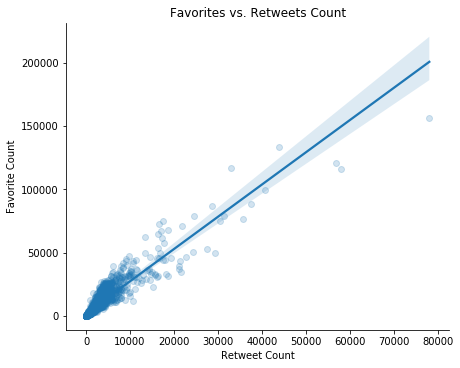

In [234]:
# Plot scatterplot of favorite vs retweet count
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=twitter_combined_clean_df,
           size = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Favorites vs. Retweets Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

The figure above shows that favorites and retweets are highly positively correlated. For about every 4 favorites, there is 1 retweet. Majority of the data falls under 40,000 favorites and 12,000 retweets.

#### What is the breakdown of the source?

In [235]:
twitter_combined_clean_df['source'].value_counts()

Twitter for iPhone     1943
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                10
Name: source, dtype: int64

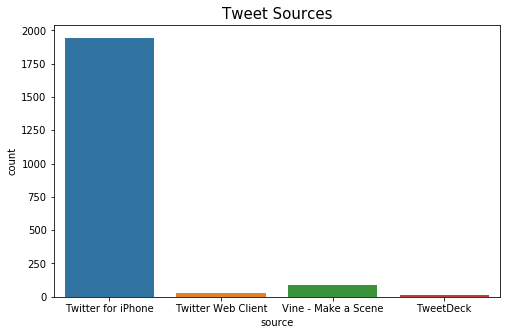

In [236]:
fig = plt.figure(figsize=[8, 5])
sns.countplot(data=twitter_combined_clean_df, x='source')
plt.title('Tweet Sources', size=15)
plt.savefig('most_used_twitter_source');

The figure above shows that the most of the tweets come from iphones, followed by vine-make a scene, and twitter web cleint. The least number of tweets come from tweetdeck.

#### What is the monthly number of tweets?

In [237]:
twitter_combined_clean_df['timestamp'].apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()

2015-11    294
2015-12    369
2016-01    181
2016-02    119
2016-03    129
2016-04     58
2016-05     58
2016-06     89
2016-07     94
2016-08     61
2016-09     68
2016-10     71
2016-11     54
2016-12     56
2017-01     68
2017-02     68
2017-03     52
2017-04     42
2017-05     43
2017-06     48
2017-07     51
2017-08      2
Name: timestamp, dtype: int64

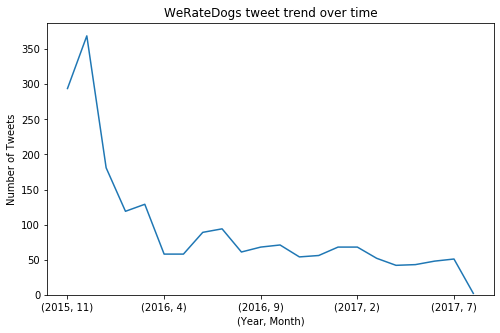

In [238]:
fig = plt.figure(figsize=[8, 5])
data = twitter_combined_clean_df.tweet_id.groupby([twitter_combined_clean_df["timestamp"].dt.year, twitter_combined_clean_df["timestamp"].dt.month]).count()
ax = data.plot(kind ='line', title='WeRateDogs tweet trend over time')
ax.set_xlabel("(Year, Month)")
ax.set_ylabel("Number of Tweets")
ax.set_ylim(0, )
plt.savefig('tweet_trend')

The above line graph shows that the tweets were higher in the beginning and slowed down rapidly after. December 2015 had the highest number of tweets after which the number of tweets started to decline rapidly until April 2016. The tweets frequency started to pick up slightly after that but then started to decline at a slower rate. Overall the number of tweets have a downward trend with a steep decline until April 2016 and slower decline after that.

#### What are the retweets and favorites counts over time?

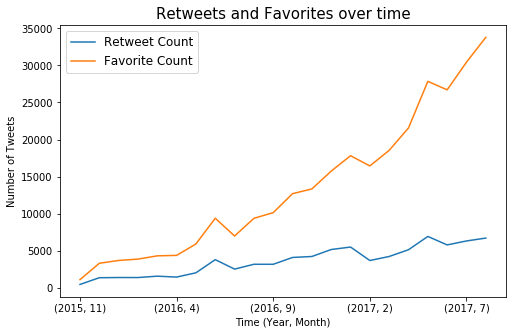

In [239]:
fig = plt.figure(figsize=[8, 5])
twitter_combined_clean_df.retweet_count.groupby([twitter_combined_clean_df['timestamp'].dt.year, twitter_combined_clean_df['timestamp'].dt.month]).mean().plot(kind = 'line')
twitter_combined_clean_df.favorite_count.groupby([twitter_combined_clean_df['timestamp'].dt.year, twitter_combined_clean_df['timestamp'].dt.month]).mean().plot(kind = 'line')
plt.title('Retweets and Favorites over time', size =15)
plt.ylabel('Number of Tweets')
plt.xlabel('Time (Year, Month)')
plt.legend(('Retweet Count', 'Favorite Count'), fontsize=12)
plt.savefig('ret_fav');

The above graph shows that both the number of favorites and retweets have grown over the time. The favorite counts are higher than that of retweet counts. The growth rate of retweets is gradual over the years. However, the number of favorites have grown heavily after a steep decline in mid 2016.

#### What is the breakdown of the dog_stage?

In [260]:
test1 = twitter_combined_clean_df['dog_stage'] != ''
twitter_combined_clean_df[test1]['dog_stage'].value_counts()

pupper      220
doggo        72
puppo        23
multiple     11
floofer       9
Name: dog_stage, dtype: int64

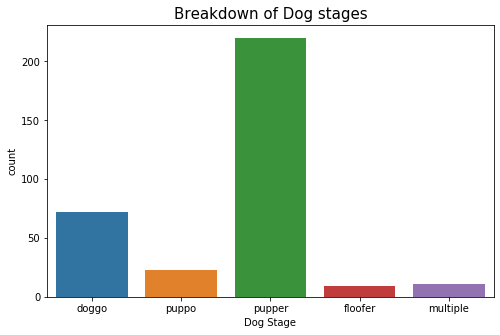

In [261]:
fig = plt.figure(figsize=[8, 5])
sns.countplot(data=twitter_combined_clean_df[test1], x='dog_stage')
plt.title('Breakdown of Dog stages', size=15)
plt.xlabel('Dog Stage')
plt.savefig('dog_stages');

The above bar shows that pupper was the highest reported with 220 counts, followed by doggo with 72 counts, puppo with 23 counts, and multiple with 11 counts. Floofer was the least reported with 4 counts.